In [1]:
!pip install tensorflow

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "/content/drive/MyDrive/dino-dragon/train"
test_dir = "/content/drive/MyDrive/dino-dragon/test"

In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid') # Используем sigmoid для бинарной классификации
])

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.002, momentum=0.8), metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11215873 (42.79 MB)
Trainable params: 11215873 (42.79 MB)
Non-trainable params: 0 (0.00 Byte)
______________

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.
Epoch 1/10
80/80 [==============================] - 393s 5s/step - loss: 0.6096 - accuracy: 0.6637 - val_loss: 0.5461 - val_accuracy: 0.7005
Epoch 2/10
80/80 [==============================] - 47s 580ms/step - loss: 0.4392 - accuracy: 0.8156 - val_loss: 0.3865 - val_accuracy: 0.8579
Epoch 3/10
80/80 [==============================] - 43s 542ms/step - loss: 0.3632 - accuracy: 0.8488 - val_loss: 0.3519 - val_accuracy: 0.8604
Epoch 4/10
80/80 [==============================] - 43s 534ms/step - loss: 0.3120 - accuracy: 0.8814 - val_loss: 0.3291 - val_accuracy: 0.8706
Epoch 5/10
80/80 [==============================] - 42s 526ms/step - loss: 0.2848 - accuracy: 0.8883 - val_loss: 0.4764 - val_accuracy: 0.7817
Epoch 6/10
80/80 [==============================] - 47s 592ms/step - loss: 0.2579 - accuracy: 0.9078 - val_loss: 0.2960 - val_accuracy: 0.8680
Epoch 7/10
80/80 [==============================] - 49s 608ms

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,  # Убедитесь, что путь указан верно
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

history_aug = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Found 1594 images belonging to 2 classes.
Epoch 1/10
80/80 [==============================] - 51s 638ms/step - loss: 0.4499 - accuracy: 0.7798 - val_loss: 0.2627 - val_accuracy: 0.8832
Epoch 2/10
80/80 [==============================] - 51s 630ms/step - loss: 0.4188 - accuracy: 0.8061 - val_loss: 0.5211 - val_accuracy: 0.7614
Epoch 3/10
80/80 [==============================] - 49s 616ms/step - loss: 0.4187 - accuracy: 0.8030 - val_loss: 0.2532 - val_accuracy: 0.8909
Epoch 4/10
80/80 [==============================] - 51s 639ms/step - loss: 0.3878 - accuracy: 0.8319 - val_loss: 0.4627 - val_accuracy: 0.7868
Epoch 5/10
80/80 [==============================] - 51s 631ms/step - loss: 0.3714 - accuracy: 0.8400 - val_loss: 0.4372 - val_accuracy: 0.8147
Epoch 6/10
80/80 [==============================] - 51s 636ms/step - loss: 0.3548 - accuracy: 0.8507 - val_loss: 0.2692 - val_accuracy: 0.8782
Epoch 7/10
80/80 [==============================] - 52s 645ms/step - loss: 0.3589 - accuracy: 0.8450

In [9]:
model.save('path_to_save_model')

Saving images.jpeg to images.jpeg


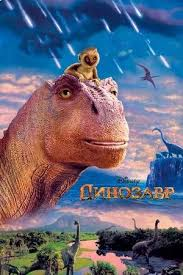

1/1 [==============================] - 0s 143ms/step
Динозавриха


In [8]:
from PIL import Image
import tensorflow as tf
from google.colab import files
from IPython.display import Image as DisplayImage

def preprocess_image(img):
    img = img.resize((150, 150))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = img_array / 255.0
    return img_array

uploaded_file = files.upload()
image_name = list(uploaded_file.keys())[0]
img = Image.open(image_name)
display(DisplayImage(image_name))

img_array = preprocess_image(img)
prediction = model.predict(tf.expand_dims(img_array, axis=0))

if prediction[0][0] > 0.5:
    print("Дракониха")
else:
    print("Динозавриха")